EDA answers one core question:

“What does the data tell us about customer behavior, profitability, and churn risk before we take decisions or build dashboards/models?”

EDA is not modeling, not prediction.
It is about:
- Understanding distributions
- Identifying patterns & relationships
- Validating business assumptions
- Guiding the next phase (profitability scoring, segmentation, Power BI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\Professional\Projects\BFSI Project\output\final\customer_churn_profitability_dataset.csv")


In [3]:
df.shape


(2000, 47)

In [4]:
df.head()


,customer_id,age,gender,city,account_tenure_months,credit_limit,credit_score,utilization_ratio,high_utilization_flag,total_spend,...,frequent_delay_flag,severe_delay_flag,credit_stress_flag,low_credit_score_flag,low_transaction_flag,no_recent_activity_flag,churn_signal_count,churn_risk_level,priority_retention_flag,data_validation_passed
0,100000,59,Male,Hyderabad,94,150000.0,337.0,0.27,False,31103.07,...,True,False,False,True,False,False,2,Medium Risk,False,True
1,100001,49,Male,Chennai,110,150000.0,438.0,1.10,True,9410.15,...,True,True,True,True,False,False,5,High Risk,False,True
2,100002,35,Male,Hyderabad,59,50000.0,494.0,0.65,False,10138.70,...,True,False,False,True,False,False,2,Medium Risk,False,True
3,100003,63,Female,Bengaluru,79,200000.0,826.0,0.96,True,14889.49,...,False,True,True,False,False,False,4,High Risk,False,True
4,100004,28,Male,Hyderabad,27,75000.0,300.0,0.31,False,8275.33,...,False,False,False,True,False,False,1,Low Risk,False,True


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2000 non-null   int64  
 1   age                       2000 non-null   int64  
 2   gender                    2000 non-null   object 
 3   city                      2000 non-null   object 
 4   account_tenure_months     2000 non-null   int64  
 5   credit_limit              2000 non-null   float64
 6   credit_score              2000 non-null   float64
 7   utilization_ratio         2000 non-null   float64
 8   high_utilization_flag     2000 non-null   bool   
 9   total_spend               2000 non-null   float64
 10  avg_transaction_value     2000 non-null   float64
 11  max_transaction_value     2000 non-null   float64
 12  transaction_count         2000 non-null   float64
 13  high_value_txn_count      2000 non-null   float64
 14  avg_mont

#### Descriptive Statistics

In [6]:
df.describe()


,customer_id,age,account_tenure_months,credit_limit,credit_score,utilization_ratio,total_spend,avg_transaction_value,max_transaction_value,transaction_count,...,spend_travel,spend_utilities,total_repaid,avg_payment_delay,max_payment_delay,delayed_payment_count,severe_delay_count,net_spend_to_limit_ratio,repaid_ratio,churn_signal_count
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,100999.500000,45.235000,62.804500,144712.500000,606.706000,0.624025,22064.03502,3691.837489,9269.814630,6.000000,...,2155.583145,2204.201675,25479.420765,7.939899,14.360000,1.439500,0.367000,0.220055,14.254102,2.284000
std,577.494589,14.044942,32.919905,84817.904255,169.239888,0.329189,15714.59622,2374.387478,10586.680365,2.451531,...,6353.896629,4016.853527,18029.959006,7.261384,11.640797,1.201691,0.605388,0.235758,378.052860,1.405465
min,100000.000000,21.000000,6.000000,50000.000000,300.000000,0.050000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100499.750000,33.000000,34.000000,75000.000000,467.000000,0.350000,12078.46750,2472.825679,5305.415000,4.000000,...,0.000000,0.000000,12353.490000,1.666667,5.000000,1.000000,0.000000,0.077250,0.522378,1.000000
50%,100999.500000,46.000000,63.000000,100000.000000,606.000000,0.620000,19789.48500,3361.424583,7821.645000,6.000000,...,0.000000,0.000000,22789.730000,7.500000,15.000000,1.000000,0.000000,0.152286,1.131035,2.000000
75%,101499.250000,57.000000,92.000000,200000.000000,754.000000,0.900000,28457.34250,4470.098214,10915.585000,8.000000,...,2395.045000,2851.597500,36484.905000,12.500000,30.000000,2.000000,1.000000,0.287593,2.201329,3.000000
max,101999.000000,69.000000,119.000000,300000.000000,899.000000,1.200000,249957.82000,49991.564000,237645.000000,16.000000,...,152767.070000,30710.720000,93466.210000,30.000000,30.000000,7.000000,4.000000,4.999156,13946.800000,7.000000


#### Profitability Distribution Analysis

Understand how revenue is distributed across customers.

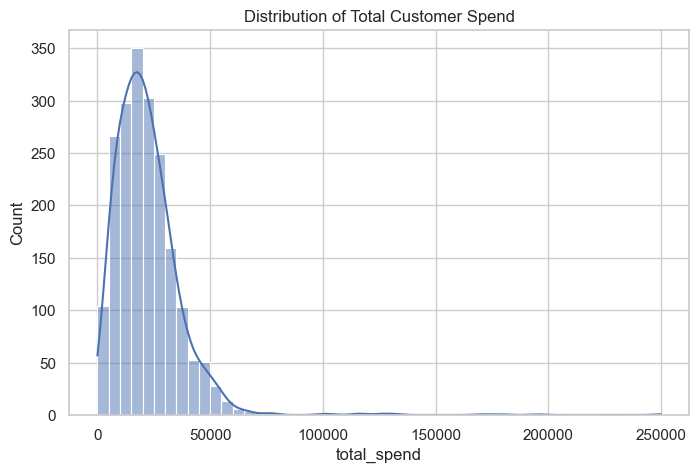

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["total_spend"], bins=50, kde=True)
plt.title("Distribution of Total Customer Spend")
plt.show()


Top Revenue Contributors

In [8]:
df["total_spend"].quantile([0.5, 0.75, 0.9, 0.95, 0.99])


0.50    19789.4850
0.75    28457.3425
0.90    38265.6290
0.95    46041.2040
0.99    61205.5630
Name: total_spend, dtype: float64

#### Credit Behavior Analysis
Credit Limit vs Spend

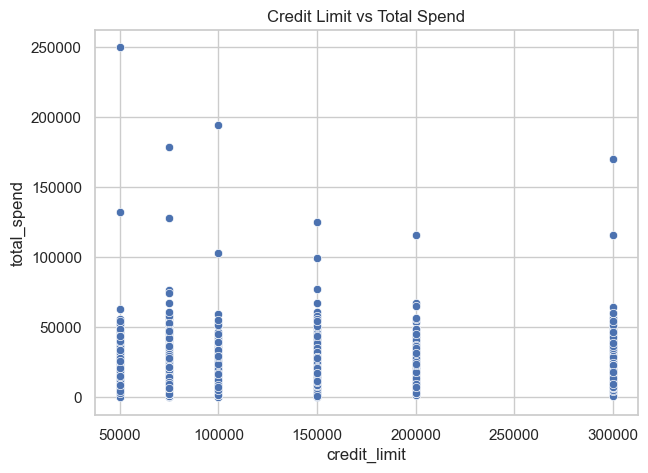

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="credit_limit",
    y="total_spend",
    data=df
)
plt.title("Credit Limit vs Total Spend")
plt.show()


Utilization Ratio Distribution

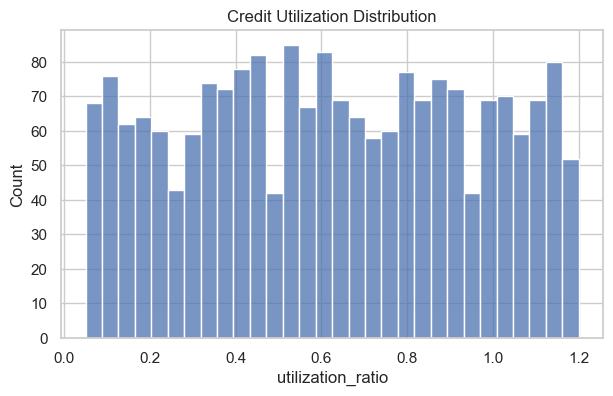

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(df["utilization_ratio"], bins=30)
plt.title("Credit Utilization Distribution")
plt.show()


#### Transaction Behavior Analysis
Transaction Count Distribution

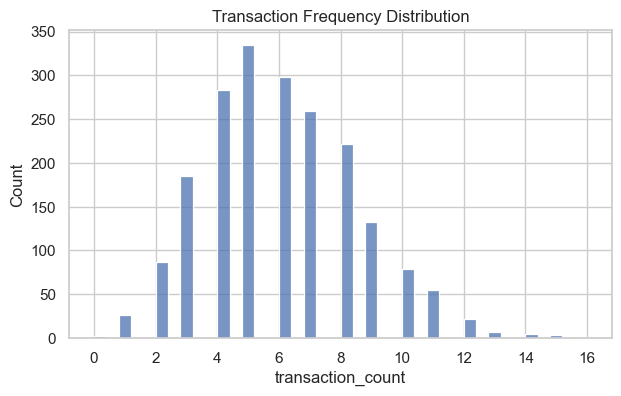

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(df["transaction_count"], bins=40)
plt.title("Transaction Frequency Distribution")
plt.show()


Avg Transaction Value vs Frequency

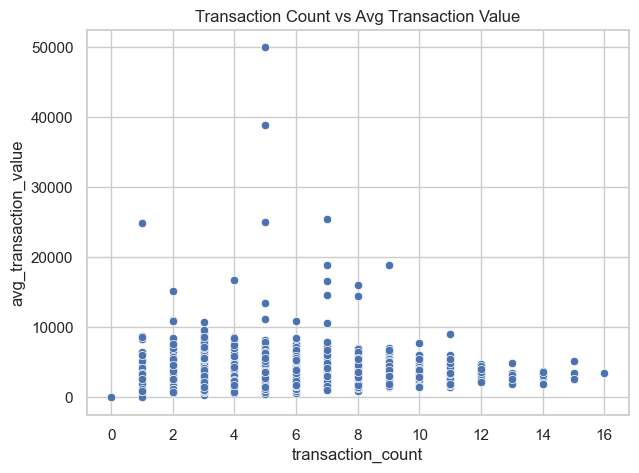

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="transaction_count",
    y="avg_transaction_value",
    data=df
)
plt.title("Transaction Count vs Avg Transaction Value")
plt.show()


#### Repayment & Payment Discipline Analysis
Average Payment Delay

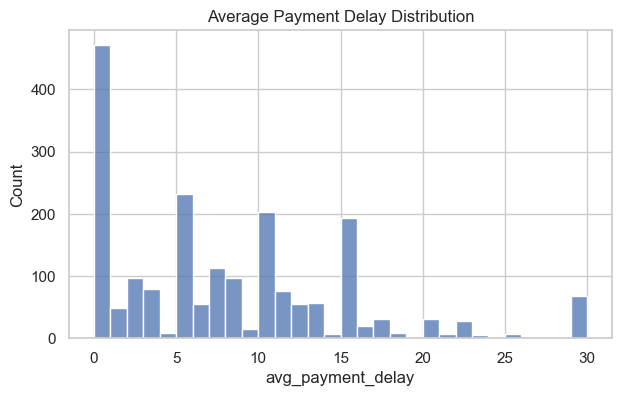

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(df["avg_payment_delay"], bins=30)
plt.title("Average Payment Delay Distribution")
plt.show()


Delays vs Churn Risk

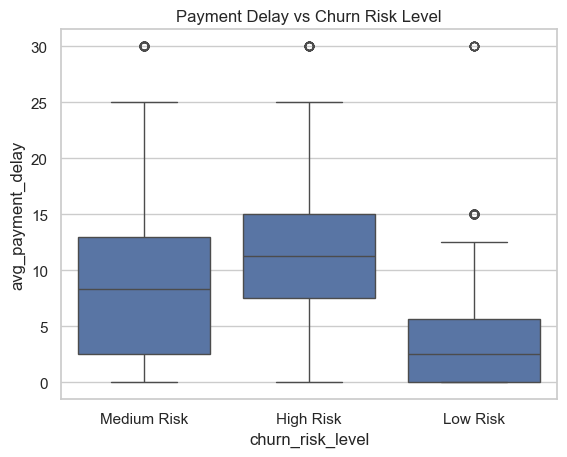

In [14]:
sns.boxplot(
    x="churn_risk_level",
    y="avg_payment_delay",
    data=df
)
plt.title("Payment Delay vs Churn Risk Level")
plt.show()


#### Churn Risk Analysis
Churn Risk Distribution

In [15]:
df["churn_risk_level"].value_counts(normalize=True)


churn_risk_level
Medium Risk    0.482
Low Risk       0.311
High Risk      0.207
Name: proportion, dtype: float64

Spend vs Churn Risk

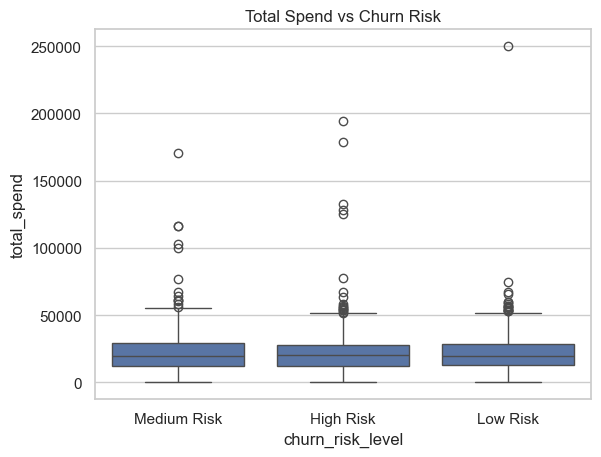

In [16]:
sns.boxplot(
    x="churn_risk_level",
    y="total_spend",
    data=df
)
plt.title("Total Spend vs Churn Risk")
plt.show()


#### High-Value & High-Risk Intersection (Critical Insight)

In [17]:
pd.crosstab(
    df["high_value_customer_flag"],
    df["churn_risk_level"],
    normalize="index"
)


churn_risk_level,High Risk,Low Risk,Medium Risk
high_value_customer_flag,,,
False,0.208333,0.31,0.481667
True,0.195000,0.32,0.485000


#### Correlation Analysis (Numerical Features)

Identify strong relationships & redundancies.

In [18]:
corr = df[[
    "total_spend",
    "transaction_count",
    "avg_transaction_value",
    "credit_limit",
    "utilization_ratio",
    "avg_payment_delay",
    "churn_signal_count"
]].corr()


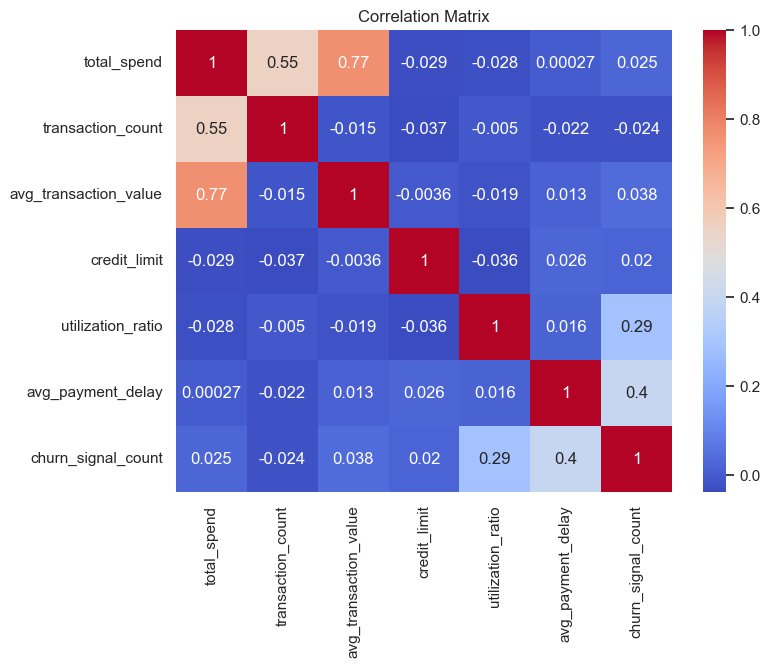

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## 🔍 Key Findings from Exploratory Data Analysis (EDA)

### 1. Dataset Readiness & Integrity
- The final EDA dataset contains **2,000 customers with 47 features**, maintaining a **one-row-per-customer** structure.
- No missing values or datatype inconsistencies were observed.
- Confirms the dataset is **analysis-ready** for profitability scoring, churn analysis, and BI reporting.

---

### 2. Revenue Contribution Is Highly Skewed
- Customer spend shows a **strong right-skewed distribution**.
- Approximate spend benchmarks:
  - **Median spend:** ~₹19.8K  
  - **Top 10%:** ~₹38K+  
  - **Top 1%:** >₹61K
- A small customer segment contributes a **disproportionate share of total revenue**, validating the need for differentiated treatment.

---

### 3. Credit Limit ≠ Profitability
- The relationship between **credit limit and total spend is weak**.
- Customers across similar credit limits display widely varying spend behavior.
- Indicates that **credit exposure alone is not a reliable indicator of profitability**; behavioral metrics are more informative.

---

### 4. Credit Utilization Signals Risk
- Credit utilization ratios show **wide dispersion**, including a segment with very high utilization.
- High utilization often aligns with **elevated churn and credit stress**, making it a critical monitoring metric.

---

### 5. Distinct Transaction Behavior Patterns
- Most customers cluster around **4–8 transactions**, with a smaller group of high-frequency users.
- Clear contrast between:
  - High-frequency, low-ticket customers
  - Low-frequency, high-ticket customers
- Supports the existence of **distinct behavioral personas** for targeted strategies.

---

### 6. Payment Discipline Strongly Correlates with Churn
- Average payment delay is **right-skewed**; most customers pay on time, but a notable tail exists.
- **High churn-risk customers exhibit significantly higher average payment delays** than low-risk customers.
- Confirms repayment behavior as a **strong early-warning churn signal**.

---

### 7. Churn Risk Distribution Is Actionable
- Churn risk split:
  - **Medium Risk:** ~48%
  - **Low Risk:** ~31%
  - **High Risk:** ~21%
- Distribution is balanced—neither overly aggressive nor conservative—yielding a **meaningful intervention segment**.

---

### 8. High-Value Customers Can Still Be High Risk
- A notable share of **high-value customers fall into medium or high churn-risk categories**.
- Represents **direct revenue leakage risk** if not proactively managed.
- These customers should be **top priority for retention initiatives**.

---

### 9. Correlation Analysis Validates Feature Design
- Strong positive correlation:
  - `total_spend` ↔ `avg_transaction_value`
- Moderate correlation:
  - `avg_payment_delay` ↔ `churn_signal_count`
- Weak correlation:
  - Credit limit ↔ churn-related metrics
- Confirms churn is **behavior-driven**, not driven by static credit attributes.

---

## ✅ Overall Business Interpretation
- **Profitability and churn are driven primarily by behavior**, not demographics or credit limits.
- A **small, high-value segment generates most revenue**, yet part of this group is vulnerable to churn.
- **Payment delays and declining engagement** are the most reliable churn indicators.
- These insights justify:
  - Targeted retention offers
  - Risk-based customer segmentation
  - Focused monitoring of high-value, high-risk customers
